In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam   

Using TensorFlow backend.


In [2]:
import numpy as np
import h5py

In [3]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model.h5')

In [4]:
PATH = os.getcwd()
# Define data path
data_path ='C:/TensorFlow/vgg16/train'
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
num_classes = 5

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


Loaded the images of dataset-Adult_leaf

Loaded the images of dataset-Child_leaf

Loaded the images of dataset-Defect_leaf

Loaded the images of dataset-Insect

Loaded the images of dataset-Perfect_leaf

(2600, 128, 128)


In [5]:
if num_channel==1:
    if K.image_dim_ordering()=='tf':
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
        

(2600, 128, 128, 1)


C:\Users\Hasibul Hasan\AppData\Local\conda\conda\envs\evn\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(128,128))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

In [8]:
if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled
#%%
# Assigning Labels

# Define the number of classes
num_classes = 5

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:325]=0
labels[325:1100]=1
labels[1100:1675]=2
labels[1675:1800]=3
labels[1800:]=4
	  
names = ['adult','child','defect','insect','perfect']
	  
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

Image: 


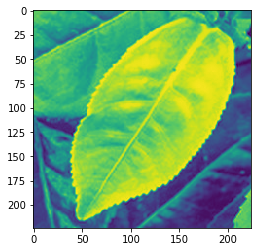

(128, 128)
(1, 128, 128, 1)
[4]
Perfect_tea_leaf


C:\Users\Hasibul Hasan\AppData\Local\conda\conda\envs\evn\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [35]:
test_image = cv2.imread('C:/TensorFlow/vgg16/test/perfect/Image1_69.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

print('Image: ')
plt.imshow(test_image)
plt.show()

test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

test_image= np.expand_dims(test_image, axis=3) 
test_image= np.expand_dims(test_image, axis=0)

print (test_image.shape)
print(model.predict_classes(test_image))
a = model.predict_classes(test_image)
if a==[0]:
    print("Adult_tea_leaf")
elif a==[1]:
    print("Child_tea_leaf")
elif a==[2]:
    print("Defect_tea_leaf")
elif a==[3]:
    print("Insect")
elif a==[4]:
    print("Perfect_tea_leaf")